In [1]:
import time
import csv
from pyrice.utils import search
from pyrice import utils
from multiprocessing import cpu_count
from argparse import ArgumentParser
from pyrice.build_dictionary import update_gene_dictionary, update_local_database
import pandas as pd
from pandasql import sqldf
from pyrice.multi_query import MultiQuery

#utils.chrome_path = "/Users/mac/Downloads/chromedriver"
utils.chrome_path = '/usr/local/share/chromedriver'

In [2]:
# Search gene and query loc
query = MultiQuery()
result = query.search_on_chromosome(chro="chr01", start_pos="1",
                           end_pos="20000", number_process = 4, dbs="all", save_path="./result/")
print("Output database:", result)

Output database: {'OsNippo01g010050': {'msu7Name': {'LOC_Os01g01010'}, 'raprepName': {'Os01g0100100'}, 'contig': 'chr01', 'fmin': 2982, 'fmax': 10815}, 'OsNippo01g010150': {'msu7Name': {'LOC_Os01g01019'}, 'raprepName': {'Os01g0100200'}, 'contig': 'chr01', 'fmin': 11217, 'fmax': 12435}, 'OsNippo01g010100': {'msu7Name': set(), 'raprepName': {'Os01g0100300'}, 'contig': 'chr01', 'fmin': 11371, 'fmax': 12284}, 'OsNippo01g010200': {'msu7Name': {'LOC_Os01g01030'}, 'raprepName': {'Os01g0100400'}, 'contig': 'chr01', 'fmin': 12720, 'fmax': 15685}, 'OsNippo01g010250': {'msu7Name': set(), 'raprepName': {'Os01g0100466'}, 'contig': 'chr01', 'fmin': 12807, 'fmax': 13978}, 'OsNippo01g010300': {'msu7Name': {'LOC_Os01g01040'}, 'raprepName': {'Os01g0100500'}, 'contig': 'chr01', 'fmin': 16398, 'fmax': 20144}}


In [ ]:
from pyrice.multi_query import MultiQuery
		
query = MultiQuery()
result = query.query_by_ids(ids=["Os08g0164400", "Os07g0586200"],
                            locs=["LOC_Os10g01006", "LOC_Os07g39750"],
                            irics=["OsNippo01g010050", "OsNippo01g010300"],
                            number_process = 4, multi_processing=True, multi_threading=True, dbs="all")
query.save(result, save_path = "./result/",
	       format=["csv", "html", "json", "pkl"], hyper_link=False)   
print("Output database:",result)   

Query iricname: OsNippo01g010050 --- Gene 1/5
Query iricname: OsNippo08g047400 --- Gene 2/5
Query iricname: OsNippo10g010050 --- Gene 3/5
Query iricname: OsNippo01g010300 --- Gene 4/5
Query iricname: OsNippo07g234650 --- Gene 5/5
Message: 

Message: 

Message: 

Message: 



In [13]:
# 富集结果可视化
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.Colormap.html
import matplotlib.pyplot as plt

In [14]:
terms_count = {'TO:0000173': 1,
             'TO:0000172': 1,
             'TO:0000074': 1,
             'TO:0000020': 1,
             'TO:0000255': 1,
             'TO:0000175': 5,
             'TO:0000276': 2,
             'TO:0000432': 1,
             'TO:0000615': 2,
             'TO:0002657': 2,
             'TO:0006001': 2,
             'TO:0000315': 1,
             'TO:0000203': 1,
             'TO:0000424': 1}



result = {'TO:0000173': 0.06951072088776344,
 'TO:0000276': 0.14543837442280644,
 'TO:0000172': 0.18792449640423628,
 'TO:0000207': 0.2433726573438867,
 'TO:0000074': 0.04746372816916571,
 'TO:0000346': 0.10289060954444594,
 'TO:0000432': 0.13460083855645136,
 'TO:0000315': 0.02924976339920014,
 'TO:0000615': 0.06953014424578507,
 'TO:0002657': 0.008030794386779826,
 'TO:0000203': 0.01049045700092949,
 'TO:0000259': 0.18190693897605642,
 'TO:0000020': 0.04073025072253464,
 'TO:0000255': 0.0008018870870473368,
 'TO:0006001': 0.16714209353569065,
 'TO:0000175': 2.046990816621011e-07,
 'TO:0000424': 0.06021322945150956}

In [15]:
sorted_result = sorted(result, key=lambda x:float(result[x]), reverse=True)

In [16]:
sorted_result

['TO:0000207',
 'TO:0000172',
 'TO:0000259',
 'TO:0006001',
 'TO:0000276',
 'TO:0000432',
 'TO:0000346',
 'TO:0000615',
 'TO:0000173',
 'TO:0000424',
 'TO:0000074',
 'TO:0000020',
 'TO:0000315',
 'TO:0000203',
 'TO:0002657',
 'TO:0000255',
 'TO:0000175']

In [43]:
np.linspace(0,1,15)

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

[4.74637282e-02 4.07302507e-02 2.92497634e-02 1.04904570e-02
 8.03079439e-03 8.01887087e-04 2.04699082e-07]


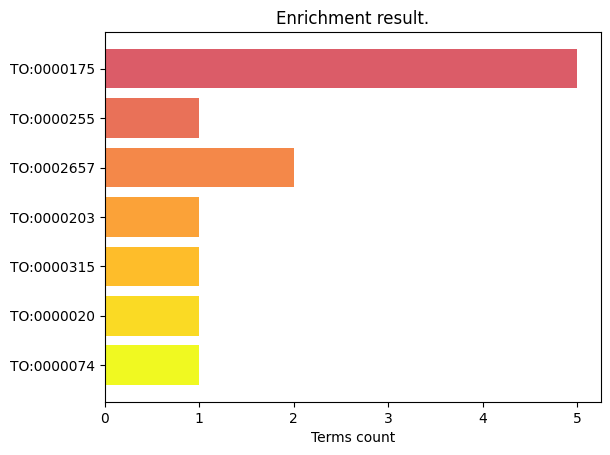

In [45]:
# y轴为富集的条目
# x轴为富集到上面的基因数目
# 颜色为富集的显著程度
#from matplotlib import colors
sorted_result = sorted(result, key=lambda x:float(result[x]), reverse=True)
y = [to for to in sorted_result if result[to]<0.05]
x = [terms_count[to] for to in y]
p = [result[to] for to in y]

norm = matplotlib.colors.Normalize(vmin=0, vmax=1.0)
p = norm(p)
# 颜色大全 https://matplotlib.org/examples/color/colormaps_reference.html
colors = matplotlib.cm.get_cmap('plasma_r')
#col = colors(p)
col = colors(np.linspace(0,1,15))

print(p)
#plt.barh(y, x, facecolor='tan', height=0.5, edgecolor='r', alpha=0.6)
plt.barh(y, x, color=col)
plt.xlabel('Terms count')
plt.title('Enrichment result.')
#plt.colorbar(p)
plt.show()

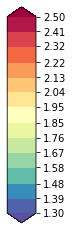

In [4]:
import numpy as np 
import pylab as plt
import matplotlib as mpl
import matplotlib

fig = plt.figure(figsize=(2, 6))
cmap = matplotlib.cm.Spectral_r
ax3 = fig.add_axes([0.3, 0.2, 0.2, 0.5]) # 四个参数分别是左、下、宽、长

norm = matplotlib.colors.Normalize(vmin=1.3, vmax=2.5)
bounds = [ round(elem, 2) for elem in np.linspace(1.3, 2.5, 14)] # 
cb3 = matplotlib.colorbar.ColorbarBase(ax3, cmap=cmap,
                                    norm=norm,
    # to use 'extend', you must
    # specify two extra boundaries:
    boundaries= [1.2] + bounds + [2.6],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
plt.show()


In [131]:
norm(p)

masked_array(data=[4.74637282e-02, 4.07302507e-02, 2.92497634e-02,
                   1.04904570e-02, 8.03079439e-03, 8.01887087e-04,
                   2.04699082e-07],
             mask=False,
       fill_value=1e+20)

In [52]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

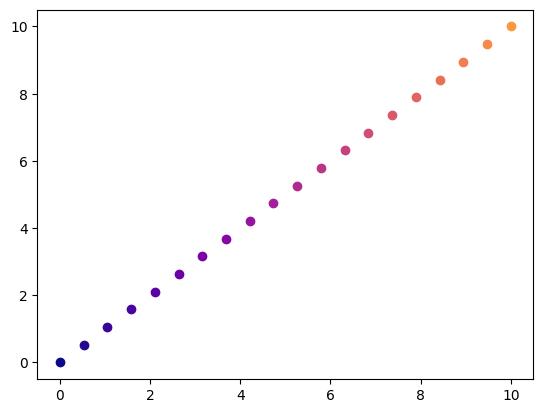

In [42]:
colors = matplotlib.cm.get_cmap('plasma')
col = colors(np.linspace(0,1,26))
a = np.linspace(0,10,20)
b = np.linspace(0,10,20)
for i, (x,y) in enumerate(zip(a,b)):
    plt.plot(x,y,color=col[i], marker='o')
plt.show()

20

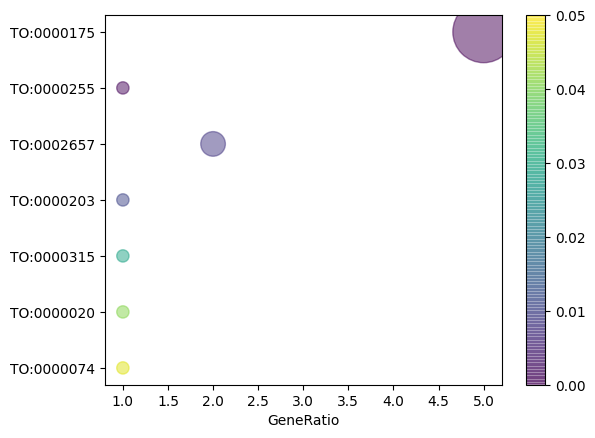

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

N = 50
y = [ to for to in sorted_result if result[ to ] < 0.05 ]
x = [ terms_count[ to ] for to in y ]
#c = np.random.randn(N)
c = [result[to] for to in y]
area = np.pi * (5 * np.array(x))**2

norm = matplotlib.colors.Normalize(vmin=0, vmax=0.05)

plt.scatter(x, y, s=area, c=c, norm=norm, alpha=0.5)
plt.xlabel('GeneRatio')
plt.colorbar()
plt.show()

In [1]:
# matplotlib 之 老老实实跟着教程走

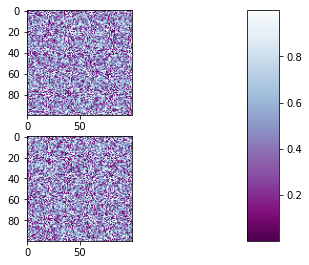

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

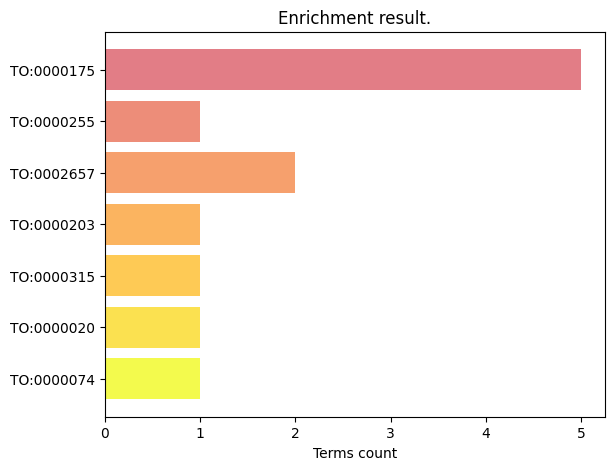

In [40]:
# y轴为富集的条目
# x轴为富集到上面的基因数目
# 颜色为富集的显著程度
#from matplotlib import colors
sorted_result = sorted(result, key=lambda x:float(result[x]), reverse=True)
y = [to for to in sorted_result if result[to]<0.05]
x = [terms_count[to] for to in y]
p = [result[to] for to in y]

norm = matplotlib.colors.Normalize(vmin=0, vmax=1.0)

# 颜色大全 https://matplotlib.org/examples/color/colormaps_reference.html
colors = matplotlib.cm.get_cmap('plasma_r')
col = colors(np.linspace(0,1,15))

fig, ax1 = plt.subplots(figsize=(5, 5))
fig.subplots_adjust(left=1, right=2)

ax1.barh(y, x, color=col, alpha=0.8)
ax1.set_xlabel('Terms count')
ax1.set_title('Enrichment result.')
#plt.colorbar(p)
plt.show()